In [ ]:
# These should already be installed on your workspace
!pip install --disable-pip-version-check --quiet -U langchain==0.2.16
!pip install --disable-pip-version-check --quiet -U langchain_openai==0.1.23
!pip install --disable-pip-version-check --quiet -U langgraph==0.2.19
!pip install --disable-pip-version-check --quiet -U langchainhub==0.1.21
!pip install --disable-pip-version-check --quiet -U tavily-python==0.4.0
!pip install --disable-pip-version-check --quiet -U langchain-community==0.2.16
!pip install --disable-pip-version-check --quiet -U python-dotenv==1.0.1

In [1]:
# Load in the OpenAI key and Tavily key.
# In the project folder, create a file named 'config.env'
# ensure your .env file contains keys named OPENAI_API_KEY="your key" and TAVILY_API_KEY="your key"
from dotenv import load_dotenv
import os 

load_dotenv('config.env')
assert os.getenv('OPENAI_API_KEY') is not None
assert os.getenv('TAVILY_API_KEY') is not None

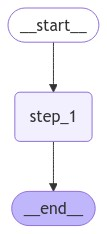

step_1 {'messages': []}


{'messages': []}

In [3]:
import time 
from langgraph.graph import MessagesState, START, StateGraph, END
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.runnables import RunnableConfig
from IPython.display import Image, display

# Helper functions
def display_text_to_user(text):
    print(text) 
    time.sleep(1) # wait for it to render before asking for input or it'll never show up.
    
def ask_user_for_input(input_description):
    response = input(input_description)
    return response
    
class State(MessagesState):
    example: str 
    
model = ChatOpenAI(temperature=0, streaming=True)
workflow = StateGraph(State)

# nodes
def step_1(state):
    print('step_1 called', state)
    return state

workflow.add_node("step_1", step_1)
workflow.add_edge(START, "step_1")
workflow.add_edge("step_1", END)


memory = MemorySaver()
app = workflow.compile(checkpointer=memory)
display(Image(app.get_graph().draw_mermaid_png()))

config = RunnableConfig(recursion_limit=2000, configurable={"thread_id": "2"})  


initial_state = {"messages": [],}
    
app.invoke(
    initial_state,
    config,
)